## Decision Trees

Decision Trees algorithm can be used to solve both regression and classification tasks.

Structure of decision trees:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" width="400">

<b>Root node</b>: Starting point of decision trees

<b>Decision node</b>: Intermediate points of decision trees after node splitting

<b>Leaf node</b>: End points of decision trees, where nodes could not be split further

Note that decision tree is considered as a greedy algorithm built in top-down recursive or divide-and-conquer manner, which is very prone to model overfitting

<b>Assumptions of Decision Tree</b>:
1. Whole training set is considered as root at start of model training
2. Feature values are categorical. If continuous, then they are discretized into thresholds before model training.
3. Records are distributed recursively on the basis of feature values.
4. Order to placing attributes as root or decision node of the tree is done by using some statistical approach

<b>Requirement of feature scaling: No</b>

<b>Robust to outliers: Yes</b>

<b>Advantages of Decision Trees</b>:
1. Can solve both regression and classification tasks
2. Rules of splitting clearly mentioned
3. Decision tree can be visualized for easy understanding
4. Feature scaling not required
5. Not sensitive to outliers
6. Model performance not impacted by missing values

<b>Disadvantages of Decision Trees</b>:
1. Small changes in training data causes model instability
2. High probability of model overfitting without tree pruning
3. Longer time needed for model training

<b>Time complexity of model training: O(n*log(n)*p)</b>

<b>Time complexity of model prediction: O(d)</b>

<b>Space complexity of model prediction: O(k)</b> 

n - Number of training samples

p - Number of features

d - Maximum depth of tree

k - Number of nodes in tree

<b>Methods to handle imbalanced dataset</b>:
1. Assign class weights to model
2. Resampling techniques (Oversampling/SMOTETomek)

## Fundamentals of Decision Trees

Since order of feature splits can be arranged in many different orders, the optimum decision tree that provides the best model performance is determined based on these main concepts:

- Entropy and Information Gain
- Gini Impurity Index

Note that scikit-learn library uses <b>CART (Classification and Regression Trees)</b> algorithm to determine optimum order of feature splits of decision trees, which uses gini impurity (by default) or entropy.

Other algorithms related to decision trees:
1. ID3 (Iterative Dichotomiser) - Uses information gain as criteria for finding root nodes and it only accepts categorical features.

2. C4.5 - Extension of ID3 algorithm, which accepts both categorical and continuous features

## Entropy and Information Gain

<b>Entropy</b> represents the purity measure of subset splits for specific node in terms of bits <b>between 0 and 1 for binary class</b>.

Formula for entropy at node S before split:
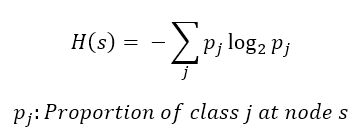

Interpretation of entropy value:

- 1 - Split is impure (equal proportion between classes after split).
- 0 - Split is pure (100% proportion belonging to given class without randomness).

Note that entropy value of 0 bits on leaf nodes is more favourable for decision trees.

<b>Information gain</b> represents the effective change in entropy after selecting a specific feature for data splitting.

Formula for information gain at node S based on split of feature A:

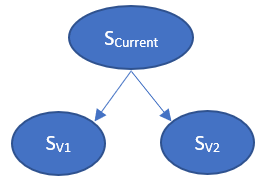

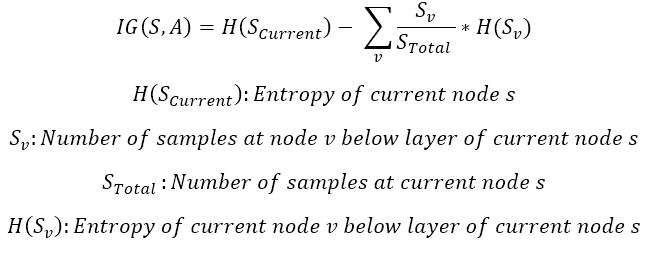

Decision Tree algorithm selects the order of splits that provides the <b>highest information gain</b> at every layer of decision tree.

## Gini Impurity Index

Gini Impurity is the probability of incorrectly classifying an observation, which is another purity measure of subset splits for specific node in terms of bits between 0 and 0.5 for binary class.

Formula of gini impurity at node i:

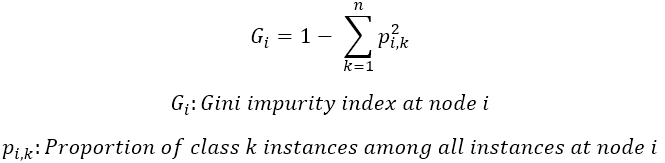

Decision Tree algorithm selects the order of splits that provides the <b>lowest gini impurity index</b> at every layer of decision tree.

Note that gini impurity is more computationally efficient than entropy, since log calculation is not used for calculating gini impurity.

## Decision Tree Splits for Numerical Features

When determining optimum decision tree splits related to numerical features:
- Numerical features sorted in ascending order
- Threshold from specific numerical feature is selected for every value to identify threshold value with best information gain

Note that working with numerical features in decision trees requires very large time training complexity.

## Decision Tree for Regression

For regression tasks, features are divided into distinct and non-overlapping regions, where observations within the region are predicted as the average of target values.

The non-overlapping regions are determined by minimizing the following sum of squared residuals:

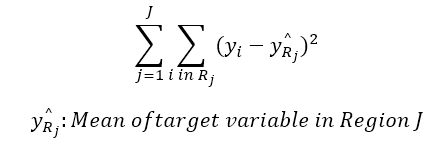


## Decision Tree Example (Classification)

Refer to the following documentation for more details about the use of Decision Tree Classification on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The following example below illustrates the process of creating a decision tree classification model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, mean_squared_error
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

Since num_outbound_cmds and is_host_login variables have only 1 unique value, both variables can be removed from the dataset.

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

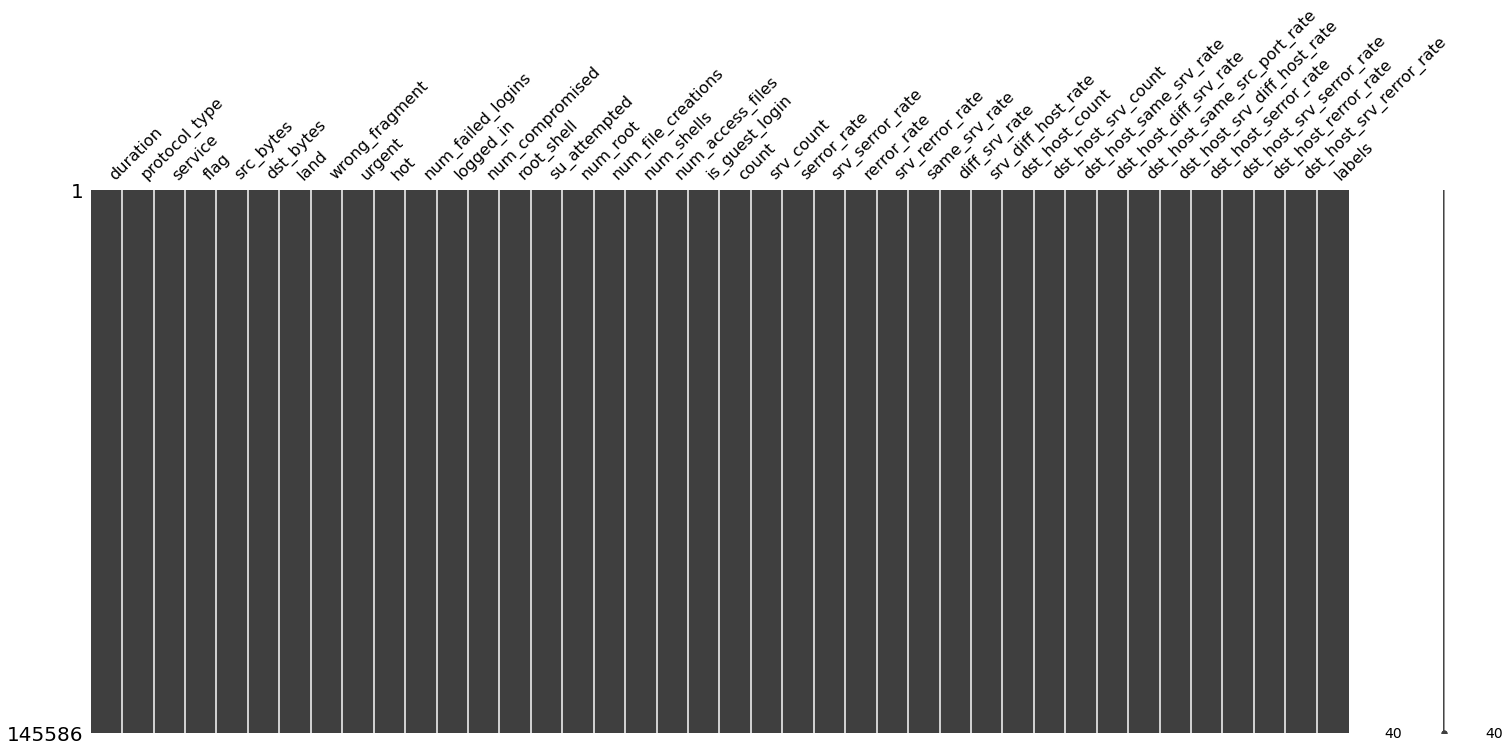

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

From the output above, there are no missing values found in the dataset.

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

Since land and urgent variables have very high imbalanced categories, both variables are removed from the dataset.

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
# Decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier()
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999744  0.999872  0.999808     15596
     normal.   0.999355  0.998824  0.999089     26360
      others   0.980947  0.987791  0.984357      1720

    accuracy                       0.998764     43676
   macro avg   0.993348  0.995495  0.994418     43676
weighted avg   0.998769  0.998764  0.998766     43676



In [20]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

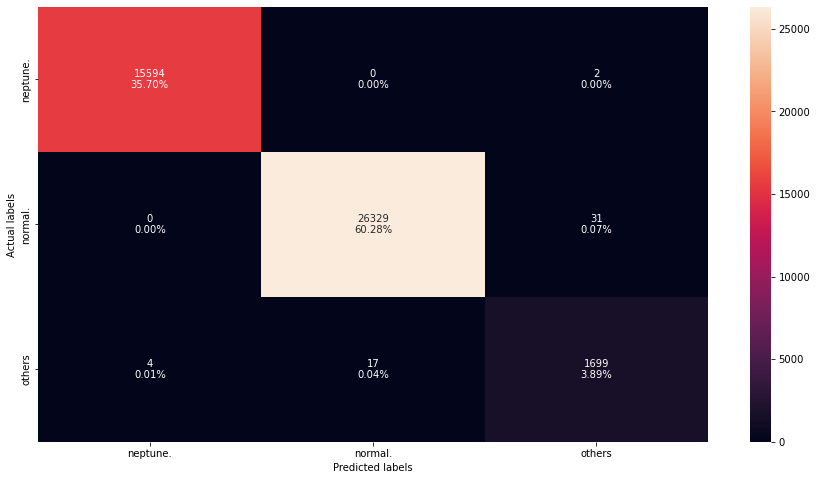

In [21]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

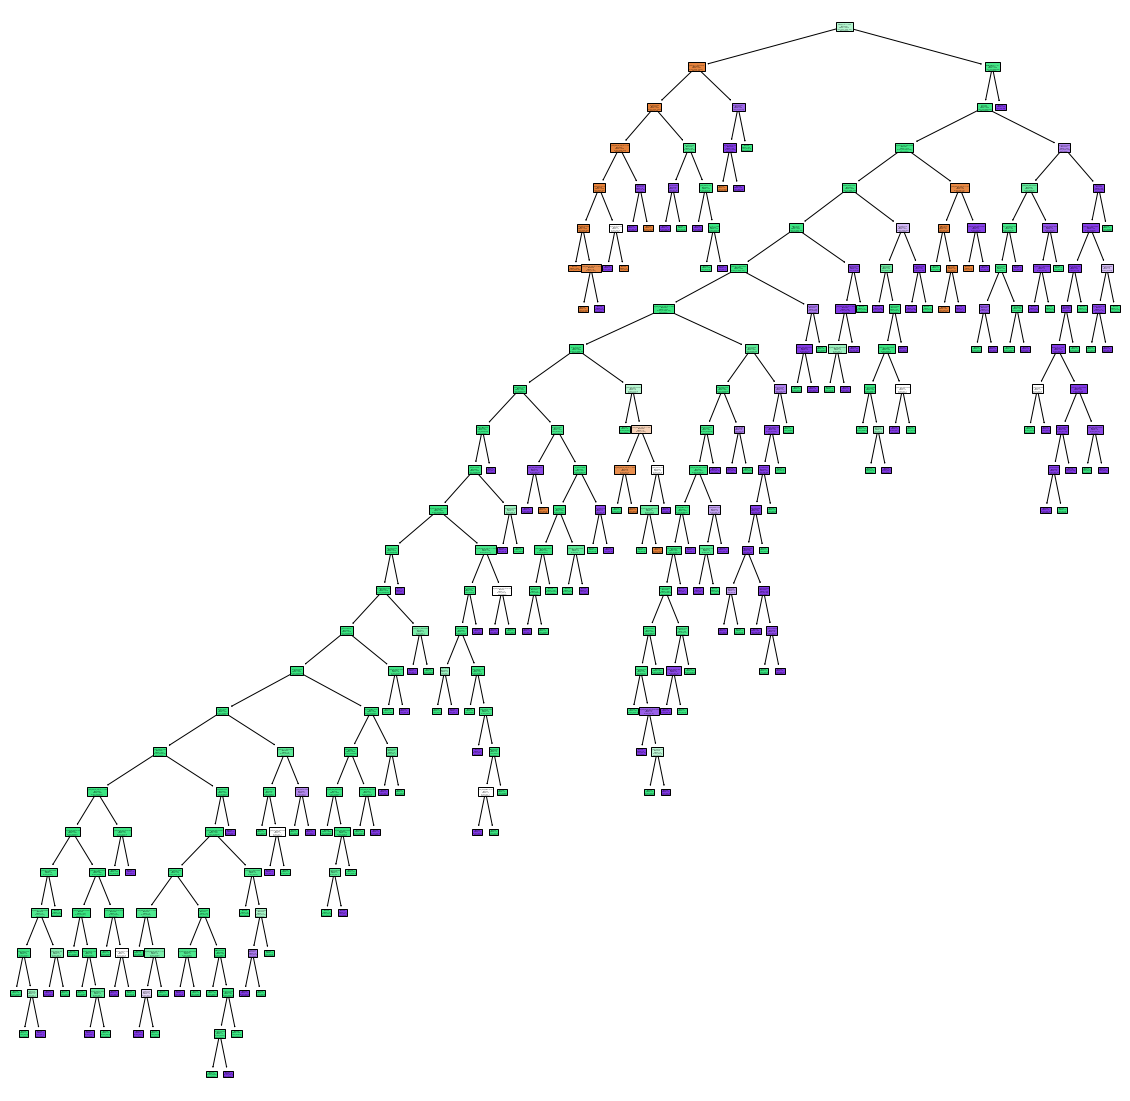

In [22]:
# Complete Decision Tree plot
plt.figure(figsize=(20,20))
features = X_train_encoded.columns
classes = ['normal.','neptune.','others']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

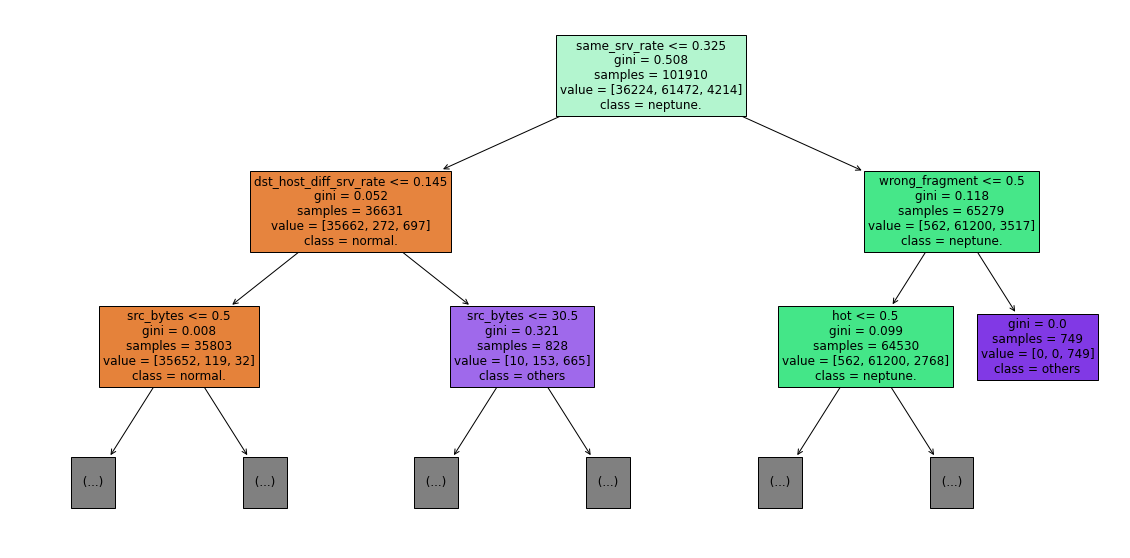

In [23]:
# Subset Decision Tree plot with maximum depth of 2
plt.figure(figsize=(20,10))
features = X_train_encoded.columns
classes = ['normal.','neptune.','others']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True,max_depth=2, fontsize=12)
plt.show()

In [24]:
resampler = SMOTETomek(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_encoded, y_train)

In [25]:
# Decision tree classifier on resampled data
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999680  1.000000  0.999840     15596
     normal.   0.999430  0.998407  0.998918     26360
      others   0.978760  0.991279  0.984980      1720

    accuracy                       0.998695     43676
   macro avg   0.992623  0.996562  0.994579     43676
weighted avg   0.998705  0.998695  0.998698     43676



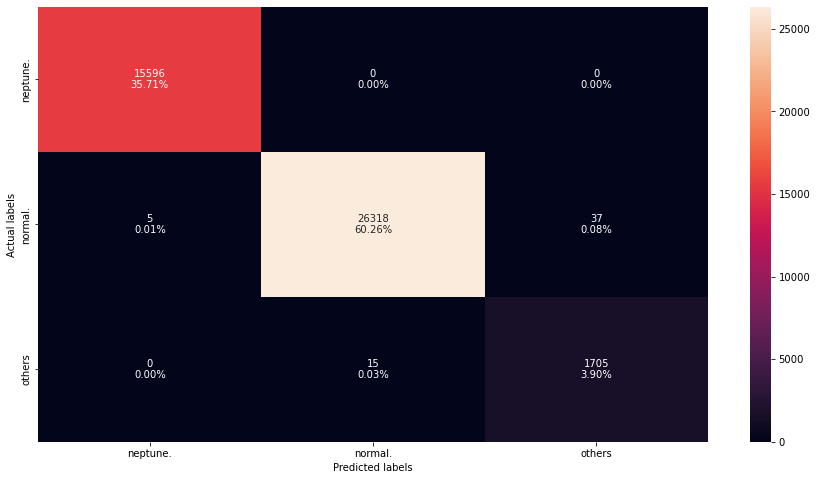

In [26]:
# Confusion matrix heatmap for classifier on resampled data
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

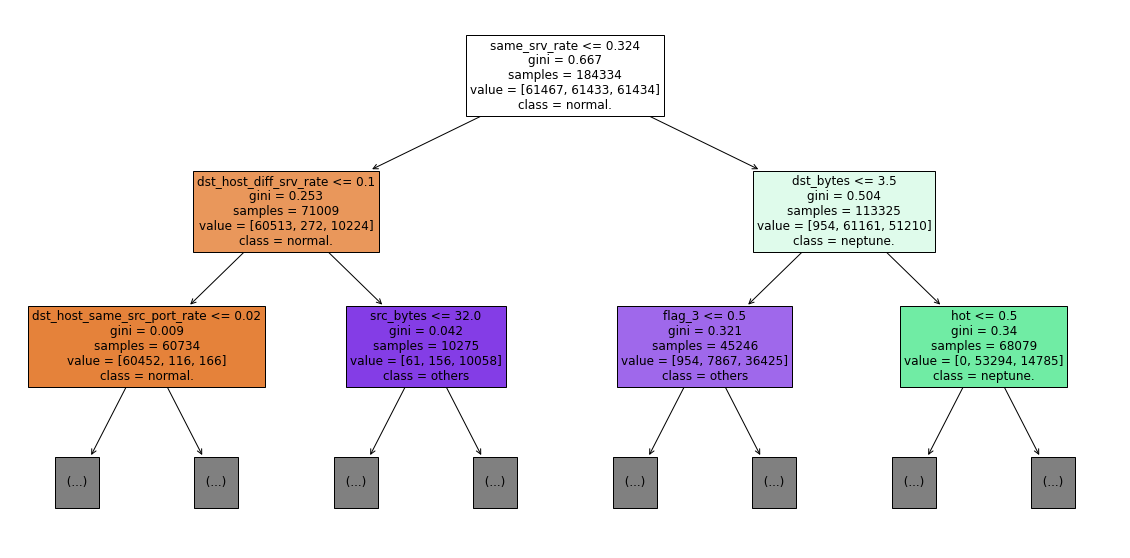

In [27]:
# decision tree plot on resampled data
plt.figure(figsize=(20,10))
features = X_train_resampled.columns
classes = ['normal.','neptune.','others']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True,max_depth=2, fontsize=12)
plt.show()

## Decision Tree Example (Regression)

Refer to the following documentation for more details about the use of Decision Tree Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 

The following example below illustrates the process of creating a decision tree regression model using sklearn library.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

In [29]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [31]:
# Decision Tree Regressor with default hyperparameters
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"R-squared value: {reg.score(X_test,y_test)}")

R-squared value: 0.5907512128359882


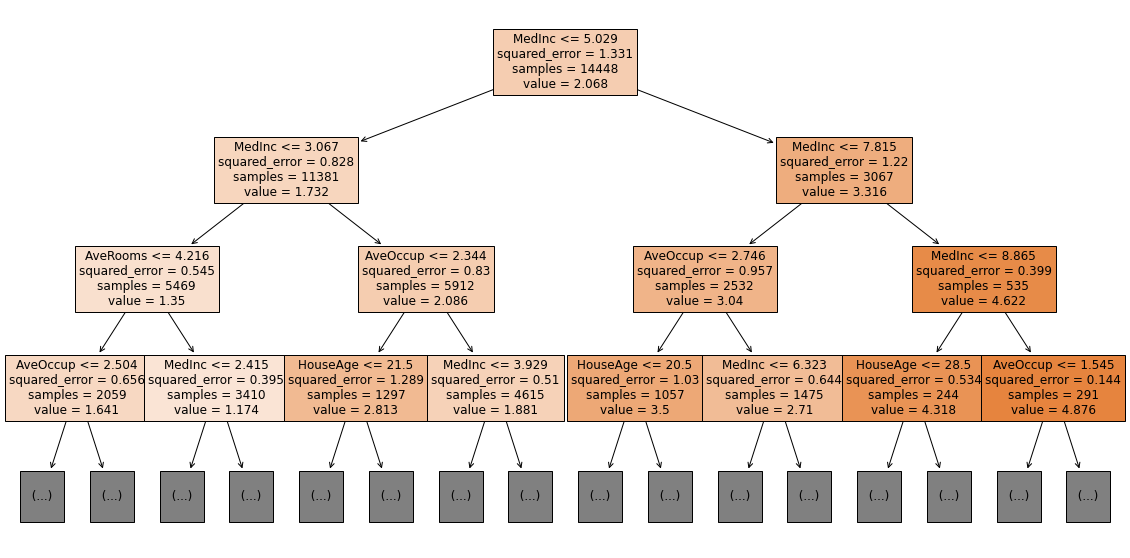

In [32]:
# Decision Tree plot with maximum depth of 3
plt.figure(figsize=(20,10))
features = X_train.columns
tree.plot_tree(reg,feature_names=features,filled=True,fontsize=12, max_depth=3)
plt.show()

## Pruning for Decision Tree

Tree pruning is the method of trimming down a full decision tree to reduce the complexity and variance in the data.

Two methods of tree pruning:
1. <b>Post-pruning</b>: Complete decision tree is generated first and then non-significant branches are removed if any improvements are identified by using cross validation methods.

2. <b>Pre-pruning</b>: Condition is used to decide when to terminate node split prematurely as decision tree is generated.

Post-pruning is the most preferred method for pruning tree-based algorithms in exchange for higher computational cost using <b>ccp_alpha</b> hyperparameter.

Most important hyperparameters for pre-pruning tree based algorithms:
1. <b>min_samples_split</b>: Best values to test are between 1 and 40
2. <b>min_samples_leaf</b>: Best values to test are between 1 and 20

### Pre-pruning example

In [33]:
# Pre-pruning decision trees with bayes search cv on various hyperparameters
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
params = {'splitter':Categorical(['best','random']), 
          'max_depth': Integer(1,200), 
          'min_samples_split': Integer(2,200),
          'min_samples_leaf': Integer(1,30), 
          'min_weight_fraction_leaf': Real(0,0.5),
          'max_leaf_nodes': Integer(2,200),
          'min_impurity_decrease':Real(0,0.5)}

reg_cv = BayesSearchCV(DecisionTreeRegressor(),params,cv=10)
reg_cv.fit(X_train, y_train)

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated

BayesSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              search_spaces={'max_depth': Integer(low=1, high=200, prior='uniform', transform='normalize'),
                             'max_leaf_nodes': Integer(low=2, high=200, prior='uniform', transform='normalize'),
                             'min_impurity_decrease': Real(low=0, high=0.5, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=200, prior='uniform', transform='normalize'),
                             'min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize'),
                             'splitter': Categorical(categories=('best', 'random'), prior=None)})

In [34]:
reg_cv.best_params_

OrderedDict([('max_depth', 200),
             ('max_leaf_nodes', 200),
             ('min_impurity_decrease', 0.0),
             ('min_samples_leaf', 30),
             ('min_samples_split', 2),
             ('min_weight_fraction_leaf', 0.0),
             ('splitter', 'best')])

In [35]:
reg = DecisionTreeRegressor()
scores = cross_val_score(reg, X, y, cv=10)
print(f'Cross validation scores: {scores}')
print(f'Highest score: {np.max(scores)}')
print(f'Lowest score: {np.min(scores)}')
print(f'Average score: {np.mean(scores)}')

Cross validation scores: [-0.25856952  0.22836028  0.46468006  0.28961509  0.52575436  0.27765047
 -0.04225499  0.25494532  0.16180945  0.37700808]
Highest score: 0.5257543573291303
Lowest score: -0.2585695209684218
Average score: 0.22789985833346735


In [36]:
reg = DecisionTreeRegressor()
scores = np.sqrt(np.abs(cross_val_score(reg, X, y, cv=10,scoring='neg_mean_squared_error')))
print(f'Cross validation RMSE: {scores}')
print(f'Highest RMSE: {np.max(scores)}')
print(f'Lowest RMSE: {np.min(scores)}')
print(f'Average RMSE: {np.mean(scores)}')

Cross validation RMSE: [1.10189669 0.92990372 0.84441447 0.71396352 0.89483271 0.89958213
 0.75595522 1.02069452 1.00765988 0.74355722]
Highest RMSE: 1.1018966864203676
Lowest RMSE: 0.7139635172651404
Average RMSE: 0.8912460086175227


In [37]:
reg = DecisionTreeRegressor(max_depth = reg_cv.best_params_['max_depth'], 
                            max_leaf_nodes = reg_cv.best_params_['max_leaf_nodes'], 
                            min_samples_split= reg_cv.best_params_['min_samples_split'], 
                            min_samples_leaf= reg_cv.best_params_['min_samples_leaf'],
                           min_weight_fraction_leaf=reg_cv.best_params_['min_weight_fraction_leaf'],
                           splitter=reg_cv.best_params_['splitter'])
scores = cross_val_score(reg, X, y, cv=10)
print(f'Cross validation scores: {scores}')
print(f'Highest score: {np.max(scores)}')
print(f'Lowest score: {np.min(scores)}')
print(f'Average score: {np.mean(scores)}')

Cross validation scores: [0.22675469 0.55217105 0.63287887 0.6028536  0.67306778 0.61050094
 0.31439928 0.47186557 0.37157571 0.55244688]
Highest score: 0.6730677813041788
Lowest score: 0.2267546885397087
Average score: 0.5008514365372031


In [38]:
reg = DecisionTreeRegressor(max_depth = reg_cv.best_params_['max_depth'], 
                            max_leaf_nodes = reg_cv.best_params_['max_leaf_nodes'], 
                            min_samples_split= reg_cv.best_params_['min_samples_split'], 
                            min_samples_leaf= reg_cv.best_params_['min_samples_leaf'],
                           min_weight_fraction_leaf=reg_cv.best_params_['min_weight_fraction_leaf'],
                           splitter=reg_cv.best_params_['splitter'])
scores = np.sqrt(np.abs(cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')))
print(f'Cross validation RMSE: {scores}')
print(f'Highest RMSE: {np.max(scores)}')
print(f'Lowest RMSE: {np.min(scores)}')
print(f'Average RMSE: {np.mean(scores)}')

Cross validation RMSE: [0.85501682 0.70921277 0.75083831 0.54734652 0.74301799 0.67072133
 0.61323113 0.86839382 0.8830665  0.60181349]
Highest RMSE: 0.8830664989155583
Lowest RMSE: 0.5473465240496499
Average RMSE: 0.7242658687807576


### Post-pruning example

Post-pruning decision trees require the use of <b>cost complexity pruning</b>, which simplifies the process of reducing overfitting on decision trees.

In [39]:
reg = DecisionTreeRegressor()
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

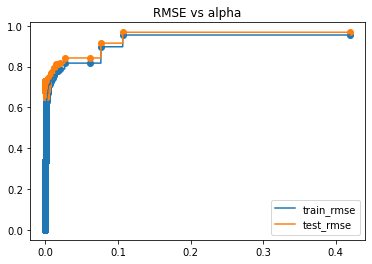

In [40]:
train_rmse = []
test_rmse = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train_pred,y_train)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test_pred,y_test)))

plt.scatter(ccp_alphas,train_rmse)
plt.scatter(ccp_alphas,test_rmse)
plt.plot(ccp_alphas,train_rmse,label='train_rmse',drawstyle="steps-post")
plt.plot(ccp_alphas,test_rmse,label='test_rmse',drawstyle="steps-post")
plt.legend()
plt.title('RMSE vs alpha')
plt.show()

In [41]:
min_index = np.argmin(np.abs(np.array(test_rmse) - np.array(train_rmse)))
print(f'CCP alpha value with lowest difference in RMSE: {ccp_alphas[min_index]}')
reg = DecisionTreeRegressor(ccp_alpha = ccp_alphas[min_index])
scores = cross_val_score(reg, X, y, cv=10)
print(f'Cross validation score: {scores}')
print(f'Highest score: {np.max(scores)}')
print(f'Lowest score: {np.min(scores)}')
print(f'Average score: {np.mean(scores)}')

CCP alpha value with lowest difference in RMSE: 0.10656160443171026
Cross validation score: [ 0.46989286  0.04701777  0.22267396  0.42289455  0.26454865  0.38763146
 -0.26754076  0.03374508 -0.02942083  0.08100756]
Highest score: 0.46989285698149763
Lowest score: -0.26754076427254025
Average score: 0.16324502950436467


In [42]:
reg = DecisionTreeRegressor(ccp_alpha = ccp_alphas[min_index])
scores = np.sqrt(np.abs(cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')))
print(f'Cross validation RMSE: {scores}')
print(f'Highest RMSE: {np.max(scores)}')
print(f'Lowest RMSE: {np.min(scores)}')
print(f'Average RMSE: {np.mean(scores)}')

Cross validation RMSE: [0.70794226 1.03457711 1.09255508 0.65980353 1.11441627 0.84099874
 0.83381466 1.17460094 1.13022108 0.86237388]
Highest RMSE: 1.1746009390541916
Lowest RMSE: 0.6598035286617171
Average RMSE: 0.9451303554852183
